In [1]:
import import_ipynb
import GraphGenerator as gg
import BruteForce as bf
from matplotlib import pyplot as plt
import BruteForceOptimized as bfo

importing Jupyter notebook from GraphGenerator.ipynb
importing Jupyter notebook from BruteForce.ipynb
importing Jupyter notebook from BruteForceOptimized.ipynb


In [2]:
def plot(num_iterations, length_per_iteration):
    plt.plot(range(1, num_iterations+1), length_per_iteration, color='xkcd:ruby', label='Best Weight')
    plt.xlabel('Iterations')
    plt.ylabel('Best Weight')
    plt.title('Shortest Number of Steps in Each Iteration')
    plt.legend()

Graph with 23 nodes and 23 edges [2, 1, 13, 21, 5, 19, 12, 11, 14, 10] 15 3


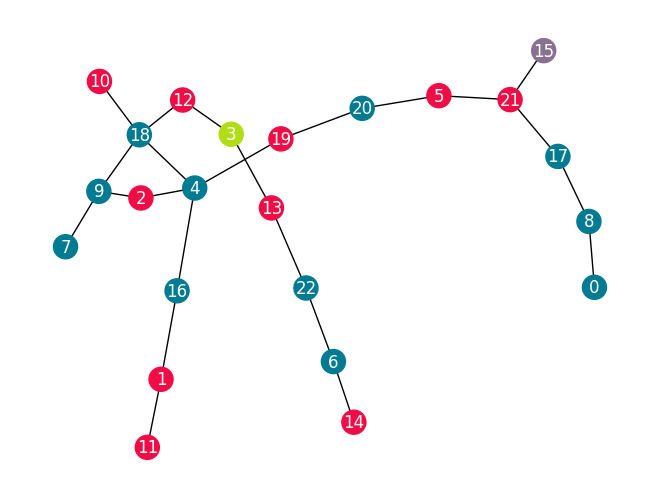

In [3]:
num_iterations = 100
g, obstacles, start_pos, goal_pos = gg.build_graph()

In [4]:
# Brute Force:
length_per_iteration_bf = bf.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 221 was found in iteration 98
Time it took to finish the search: 9.670471
Best path of all iterations: 
('o', '10->18')
('o', '2->9')
('o', '21->17')
('o', '14->6')
('o', '17->8')
('o', '9->4')
('o', '12->18')
('o', '9->12')
('r', '15->21')
('o', '19->20')
('o', '4->2')
('o', '5->21')
('o', '12->18')
('o', '9->7')
('o', '2->9')
('o', '11->16')
('o', '16->4')
('r', '21->17')
('o', '21->17')
('o', '7->2')
('o', '7->9')
('o', '17->21')
('o', '4->10')
('o', '8->0')
('o', '9->7')
('o', '10->18')
('o', '2->19')
('o', '13->22')
('o', '20->5')
('o', '18->10')
('o', '7->9')
('o', '22->13')
('o', '13->22')
('o', '6->14')
('o', '21->20')
('o', '2->4')
('o', '21->17')
('o', '4->16')
('o', '22->6')
('o', '6->22')
('r', '15->21')
('o', '9->18')
('o', '20->5')
('o', '5->20')
('o', '22->6')
('o', '16->4')
('o', '4->16')
('o', '11->1')
('o', '17->8')
('o', '6->22')
('r', '21->5')
('o', '18->12')
('o', '1->11')
('o', '11->1')
('o', '0->17')
('o', '1->11')
('r', '5->21')
('o', '16->

In [5]:
length_per_iteration_bfo = bfo.find_path(g, start_pos, goal_pos, obstacles, num_iterations=num_iterations)

The minimum length of 303 was found in iteration 70
Time it took to finish the search: 0.010473
Best path of all iterations: [15, 21, 5, 20, 19, 4, 18, 12, 3]
19->4
13->22
1->16
10->18
5->20
22->6
21->17
6->22
18->9
11->1
22->6
20->5
17->8
9->7
7->9
4->18
6->22
9->7
1->11
16->1
5->21
18->10
8->17
2->4
4->2
21->5
2->9
10->18
1->16
18->10
22->6
6->22
5->21
9->18
11->1
21->5
16->4
14->6
17->21
4->16
18->9
22->13
16->4
6->14
10->18
1->11
4->16
5->20
11->1
16->4
20->19
18->10
19->20
4->2
10->18
20->19
18->4
9->18
14->6
7->9
21->17
6->22
9->7
4->16
2->9
22->6
19->4
13->22
9->2
1->11
18->10
11->1
10->18
1->11
16->1
18->10
10->18
1->16
22->13
16->1
1->16
11->1
17->21
2->9
1->11
4->19
16->4
18->10
11->1
4->16
10->18
13->22
1->11
22->13
21->5
16->4
6->14
18->10
13->22
9->18
11->1
18->9
5->21
12->18
18->12
21->5
12->18
22->6
1->11
9->2
2->9
9->2
5->20
7->9
11->1
20->5
19->20
6->22
9->7
20->19
2->9
4->16
1->11
5->21
11->1
9->2
14->6
7->9
9->7
18->12
12->18
6->14
1->11
18->12
22->6
12->18
2->4
7->9

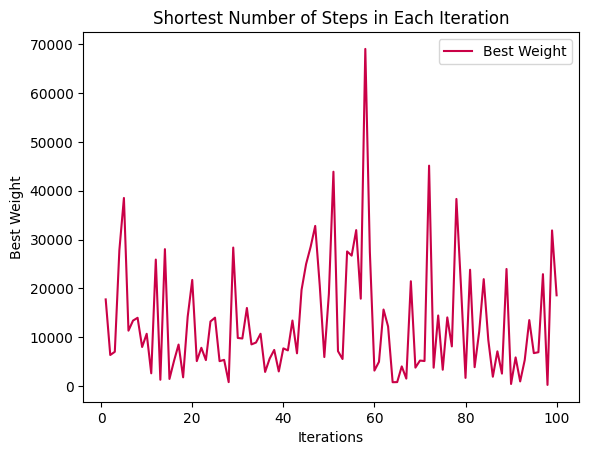

In [10]:
plot(num_iterations, length_per_iteration_bf)

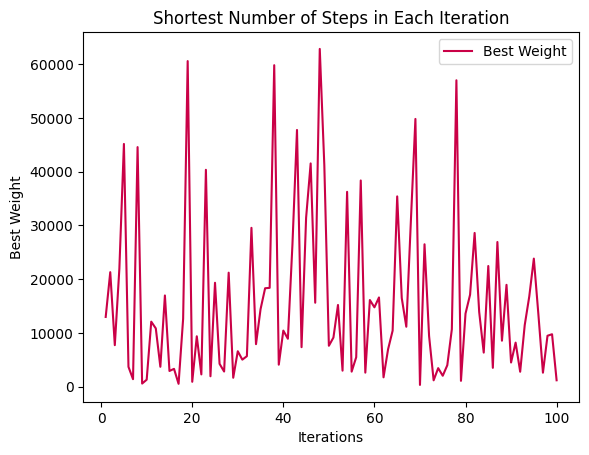

In [9]:
plot(num_iterations, length_per_iteration_bfo)